In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
csv = pd.read_csv('C:/Users/meena/Documents/Python_Scripts/Assign2.csv')

In [4]:
csv.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [5]:
price_data = csv.drop(['id','date','bathrooms','waterfront','condition','sqft_above','yr_built','yr_renovated','view'],1)
price_data.head()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,sqft_basement
0,221900.0,3,1180,5650,1.0,7,0
1,538000.0,3,2570,7242,2.0,7,400
2,180000.0,2,770,10000,1.0,6,0
3,604000.0,4,1960,5000,1.0,7,910
4,510000.0,3,1680,8080,1.0,8,0


# Multicolinearity
Multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated. We will find collinearity using correaltion heat map

In [6]:
price_data.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,sqft_basement
price,1.000000,0.308338,0.702044,0.089655,0.256786,0.667463,0.323837
bedrooms,0.308338,1.000000,0.576671,0.031703,0.175429,0.356967,0.303093
sqft_living,0.702044,0.576671,1.000000,0.172826,0.353949,0.762704,0.435043
sqft_lot,0.089655,0.031703,0.172826,1.000000,-0.005201,0.113621,0.015286
floors,0.256786,0.175429,0.353949,-0.005201,1.000000,0.458183,-0.245705
grade,0.667463,0.356967,0.762704,0.113621,0.458183,1.000000,0.168392
sqft_basement,0.323837,0.303093,0.435043,0.015286,-0.245705,0.168392,1.000000


There is no strong correlation

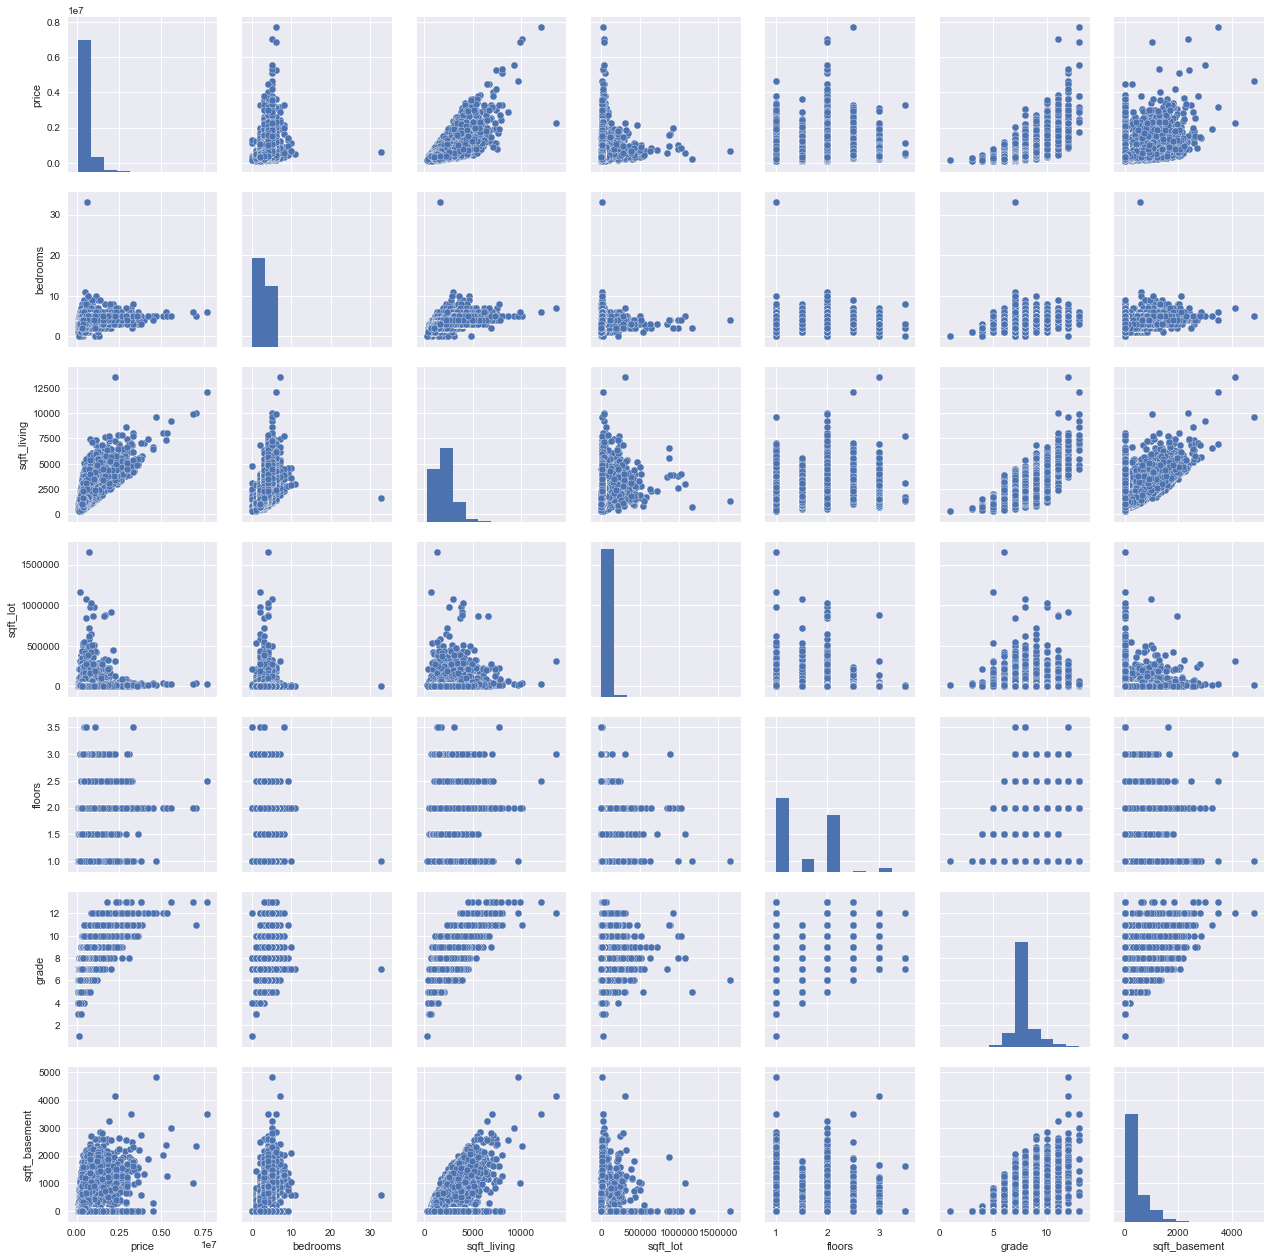

In [7]:
sb.pairplot(price_data)

As seen floors are categorigal data without forming a linear relationship.So we will remove floors

In [8]:
price = price_data.drop(['floors'],1)
price.head()

,price,bedrooms,sqft_living,sqft_lot,grade,sqft_basement
0,221900.0,3,1180,5650,7,0
1,538000.0,3,2570,7242,7,400
2,180000.0,2,770,10000,6,0
3,604000.0,4,1960,5000,7,910
4,510000.0,3,1680,8080,8,0


In [9]:
price.isnull().sum()

price            0
bedrooms         0
sqft_living      0
sqft_lot         0
grade            0
sqft_basement    0
dtype: int64

In [10]:
import statsmodels.api as sm

C:\Users\meena\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
X = price['sqft_living']
X.shape

(21613L,)

In [12]:
Y = price['price']

In [13]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.125e+05
Date:                Fri, 13 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:19:18   Log-Likelihood:            -3.0033e+05
No. Observations:               21613   AIC:                         6.007e+05
Df Residuals:                   21612   BIC:                         6.007e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1569      0.784    335.464      0.000     261.619     264.694
==============================================================================
Omnibus:                    16033.415   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689715.036
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.958   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = price['sqft_living']
Y = price['price']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 13 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:19:18   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.387e+04   4405.455     -9.958      0.000   -5.25e+04   -3.52e+04
sqft_living   280.8067      1.938    144.924      0.000     277.009     284.605
==============================================================================
Omnibus:                    14815.593   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543533.863
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Regression
Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable).
I will use the least squares method as the way to estimate the coefficients.

Y = price(also called “target” data in Python)

and

X = all the other features (or independent variables)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.DataFrame(price)
df.head()

,price,bedrooms,sqft_living,sqft_lot,grade,sqft_basement
0,221900.0,3,1180,5650,7,0
1,538000.0,3,2570,7242,7,400
2,180000.0,2,770,10000,6,0
3,604000.0,4,1960,5000,7,910
4,510000.0,3,1680,8080,8,0


In [18]:
X_multiple = df.drop('price',axis=1)
Y_multiple = df.price

In [19]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.fit(X_multiple,Y_multiple)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lm.score(X_multiple,Y_multiple)

0.54989051515176057

In [22]:
print('Estimated intercept coefficient:',lm.intercept_)
print('Number of coefficient:',(lm.coef_))

('Estimated intercept coefficient:', -513415.0803836314)
('Number of coefficient:', array([ -4.50650485e+04,   1.92488701e+02,  -2.54255314e-01,
         1.02679195e+05,   7.81678316e+01]))


In [23]:
pd.DataFrame(zip(X_multiple.columns,lm.coef_),columns = ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,bedrooms,-45065.048534
1,sqft_living,192.488701
2,sqft_lot,-0.254255
3,grade,102679.195499
4,sqft_basement,78.167832


As you can see from the data frame that there is a high correlation between Grade and price. 
Scatter plot between housing prices and Grade.

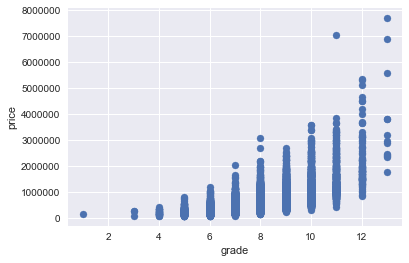

In [24]:
plt.scatter(df.grade,df.price)
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

In [25]:
#Predicted Prices
lm.predict(X_multiple)[0:5]

array([ 295844.26768124,  594265.92085272,  158203.74251222,
        472218.39896584,  494149.97348607])

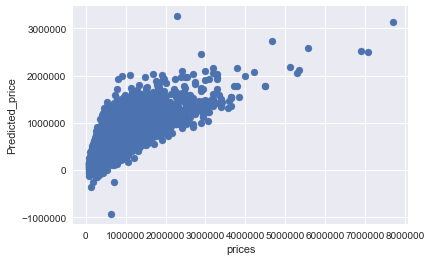

In [26]:
plt.scatter(df.price,lm.predict(X_multiple))
plt.xlabel("prices")
plt.ylabel("Predicted_price")
plt.show()

In [27]:
#Mean squared error
mse = np.mean(df.price - lm.predict(X_multiple)**2)
print mse

-3.66003270475e+11


# Training and validation data sets
In practice you wont implement linear regression on the entire data set, you will have to split the data sets into training and test data sets. So that you train your model on training data and see how well it performed on test data.Scikit learn provides a function called train_test_split to divide data sets randomly.

In [28]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X_multiple,df['price'],test_size=0.33,random_state = 5)

In [29]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

((14480, 5), (7133, 5), (14480L,), (7133L,))


In [30]:
# New linear regression model using train_test data
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [31]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 60927899094.96


In [32]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 60377455831.55


# Residual Plot
Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.

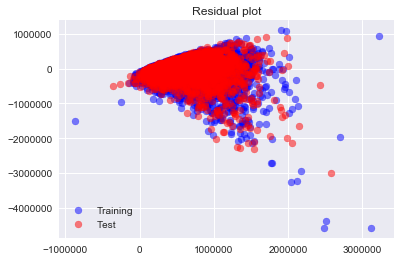

In [33]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=3000)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')